# 기상청
: https://data.kma.go.kr/stcs/grnd/grndTaList.do?pgmNo=70 

## 필요한 모듈 및 한글 글꼴 지정하기

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
# 그래프에 사용할 한글 글꼴 지정
plt.rc('font', family="NanumGothic")

# 그래프 출력시 음수가 깨지는 것을 방지함
plt.rcParams['axes.unicode_minus'] = False

## 확보된 데이터(CSV파일)을 데이터프레임으로 읽어오기

In [46]:
# 확보된 데이터에 컬럼외에 입력된 데이터로 읽어지지 않을 경우 : skiprows 사용함

df = pd.read_csv('ta_20211110171430.csv', encoding='cp949')
df.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1990-01-01,108,-1.7,-4.0,1.8
1,1990-01-02,108,-3.5,-5.7,-0.9
2,1990-01-03,108,-5.0,-7.2,-1.7
3,1990-01-04,108,-3.3,-8.9,2.1
4,1990-01-05,108,0.7,-2.4,2.1


## 특정일(자신의 생일)에 해당하는 기온 그래프 그리기

<AxesSubplot:>

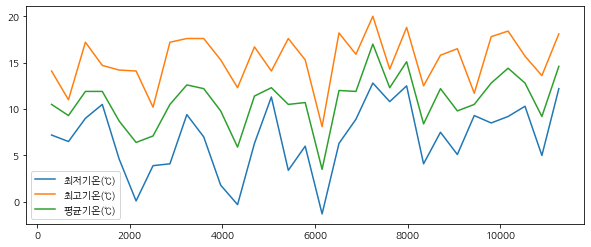

In [47]:
# 방법 1

birth = df[df['날짜'].str.contains('-11-07')]

# NaN 행 제거
birth = birth[birth['평균기온(℃)'].notnull()]
birth[['최저기온(℃)', '최고기온(℃)', '평균기온(℃)']].plot(figsize=(10,4))

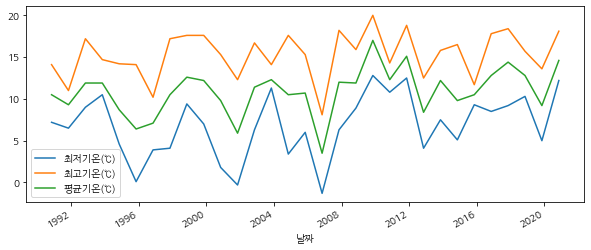

In [48]:
# 방법 2

import datetime

birth.날짜 = pd.to_datetime(birth.날짜)
birth.set_index('날짜', inplace=True)

# birth
birth[['최저기온(℃)', '최고기온(℃)', '평균기온(℃)']].plot(figsize=(10,4))
plt.show()

NameError: name 'index' is not defined

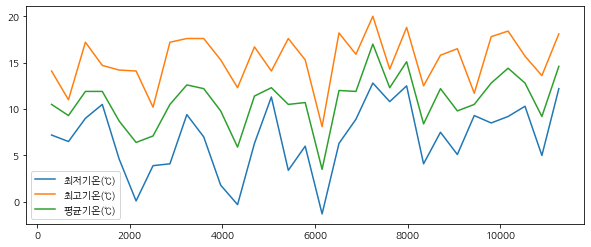

In [60]:
# 방법 3 + 년 간격을 5년 단위로 바꿔보기

# birth = df[df['날짜'].str.contains('-11-07')]

# # NaN 행 제거
# birth = birth[birth['평균기온(℃)'].notnull()]
# birth[['최저기온(℃)', '최고기온(℃)', '평균기온(℃)']].plot(figsize=(10,4))

# # 간격을 5년 단위로 바꾸기
# birth()

## 지금까지의 최고 기온을 확인
: 2018년 8월 1일에 서울의 최고 기온이 39.6도 였다

- 빅데이터 분석을 위한 Story line, 분석 로직
- Assumption 1 : 최고기온이 높은 날이 평균기온 높은 나로가 같은지 분석
- Assumption 2 : 평균기온이 높으면 최고기온이 영향을 받는가?
- Assumption 3 : 최고기온이 높으면 최저기온은 어떤 영향을 가지고 있는가?
- Assumption 4 : 최저기온이 낮으면 최고기온의 영향은 어떤지 분석
- Assumption 5 : 최저기온이 낮으면 최고기온도 낮은가?
- Assumption 6 : 최저기온이 낮으면 평균기온도 낮은가? => 어떤 관계가 있는가? => 관계성 분석
- Assumption 7 : 일교차가 가장 큰 날은 어느 날인가? 
- Assumption 8 : 일교차가 크게 발생한 년도는 언제인가?

In [49]:
maxtemp = df.iloc[[df['최고기온(℃)'].idxmax()]]
maxtemp

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
10439,2018-08-01,108,33.6,27.8,39.6


In [50]:
df.iloc[[df['평균기온(℃)'].idxmax()]]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
10440,2018-08-02,108,33.7,30.3,37.9


In [51]:
df.iloc[[df['최저기온(℃)'].idxmax()]]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
10440,2018-08-02,108,33.7,30.3,37.9


In [52]:
df.iloc[[df['최저기온(℃)'].idxmin()]]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
4032,2001-01-15,108,-15.5,-18.6,-12.4


In [53]:
df.iloc[[df['평균기온(℃)'].idxmax()]]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
10440,2018-08-02,108,33.7,30.3,37.9


In [54]:
df.iloc[[df['최고기온(℃)'].idxmin()]]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
4032,2001-01-15,108,-15.5,-18.6,-12.4


## 아래 코드로 년도, 10년 단위 그룹, 월, 계정 열(column)을 추가

- Assumption 1 : 10년 단위 기간의 분석을 통해서 데이터를 관찰한 결과를 분석하기
- Assumption 2 : 10년 단위 기간의 기온은 어떤 변화를 가지는가?
- Assumption 3 : 10년간 서울의 대기오염 및 지구온난화 영향으로 기온의 변화가 있는가?

In [55]:
# [sample 1]
# 10년 단위로 데이터 분할하기 / 월을 구분하기
# 계절을 여름으로 구분하기 - 봄, 여름, 가을, 겨울 또는 겨울, 가을, 여름, 봄
# 계절을 코드화 해서 분석하기 - 0 : 겨울, 1 : 봄, 2 : 여름, 3 : 가을

# # 원래 방법
# df1 = df.copy()
# # 날짜를 잘라서 년도만 가져오기
# df1['년도'] = df1['날짜'].str.slice(0, 4).astype(int)
# # 10년 단위 그룹으로 나누기
# df1['그룹'] = df1['년도'] // 10
# # 월 추가
# df1['월'] = df1['날짜'].str.slice(5, 7).astype(int)
# # 월을 계절로 바꾸기, 0 : 겨울, 1 : 봄, 2 : 여름, 3 : 가을
# df1['계절'] = (df1['월'] // 3) % 4

In [56]:
# 수정 방법
df1 = df.copy()
df1.날짜 = pd.to_datetime(df1.날짜)
df1['월'] = df1.날짜.dt.month
df1['계절'] = pd.cut(df1.월, bins=[0, 2, 5, 8, 11, 14], labels=["겨울", "봄", "여름", "가을", "겨울"], ordered=False)
df1['그룹'] = df1.날짜.dt.year//10*10
df1.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),월,계절,그룹
0,1990-01-01,108,-1.7,-4.0,1.8,1,겨울,1990
1,1990-01-02,108,-3.5,-5.7,-0.9,1,겨울,1990
2,1990-01-03,108,-5.0,-7.2,-1.7,1,겨울,1990
3,1990-01-04,108,-3.3,-8.9,2.1,1,겨울,1990
4,1990-01-05,108,0.7,-2.4,2.1,1,겨울,1990


<AxesSubplot:title={'center':'최고기온(℃)'}, xlabel='그룹'>

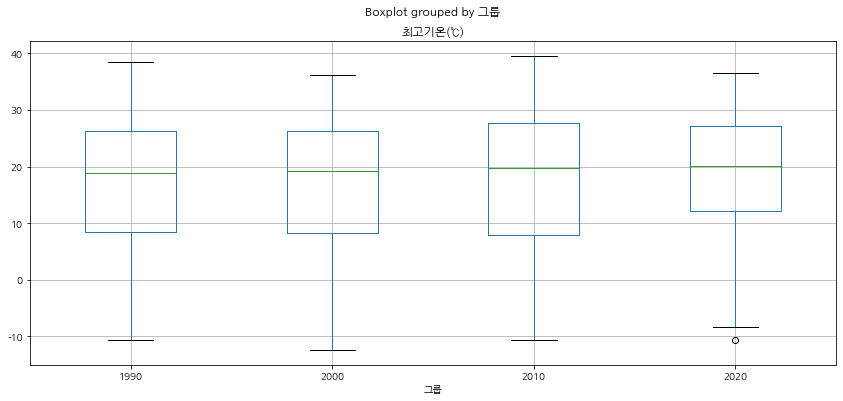

In [147]:
df1.boxplot(column = '최고기온(℃)', by='그룹', figsize=(14, 6))

- 분석
- 1) 1990년 평균적으로 온도가 낮았다. 18도 정도로 관측되었으며, 2000년, 2010년, 2020년 대비 약 1~2도의 편차를 보였다.
- 2) 데이터 분석결과, 1990년대의 대기상태와 대기 오염 상태가 상대적으로 덜하고 2000년부터 평균 온도가 상승하고 있음을 알 수 있다.
- 3) 서울지역은 2020년대 기온의 이상증상이 발생되고 있다.

<AxesSubplot:title={'center':'최고기온(℃)'}, xlabel='월'>

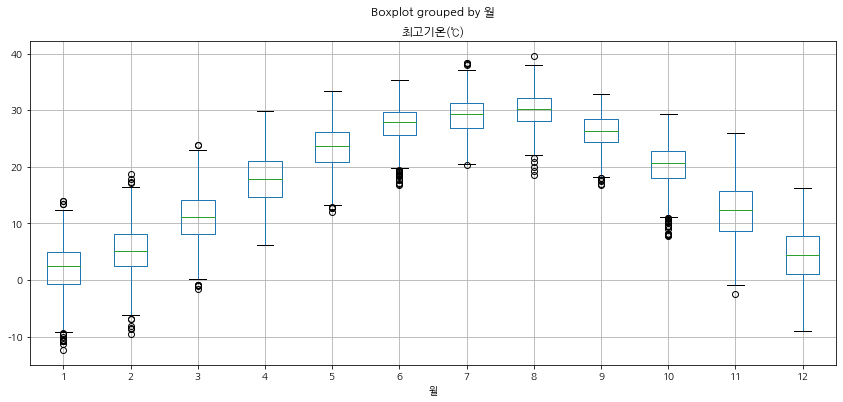

In [58]:
# 월별로도 볼 수 있다. 

df1.boxplot(column = '최고기온(℃)', by='월', figsize=(14,6))

- 분석 결과
- 1) 월간 기온 데이터 분석결과 : 4월과 12월은 기온의 이상치가 발견되지 않는다. => 기온이 상대적으로 안정적으로 관측되고 있다.
- 2) 서울지역 여름기온은 최고기온의 일정함이 관측되었다.

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11633 entries, 0 to 11632
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       11633 non-null  object 
 1   지점       11633 non-null  int64  
 2   평균기온(℃)  11633 non-null  float64
 3   최저기온(℃)  11633 non-null  float64
 4   최고기온(℃)  11632 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 454.5+ KB


In [60]:
df.describe()

,지점,평균기온(℃),최저기온(℃),최고기온(℃)
count,11633.0,11633.000000,11633.000000,11632.000000
mean,108.0,12.966415,9.044477,17.526745
std,0.0,10.348778,10.438801,10.563720
min,108.0,-15.500000,-18.600000,-12.400000
25%,108.0,4.100000,0.300000,8.400000
50%,108.0,14.300000,9.800000,19.300000
75%,108.0,22.300000,18.400000,26.700000
max,108.0,33.700000,30.300000,39.600000


<AxesSubplot:xlabel='최저기온(℃)', ylabel='최고기온(℃)'>

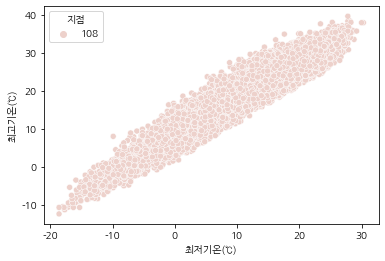

In [67]:
sns.scatterplot(x=df['최저기온(℃)'], y=df['최고기온(℃)'], hue=df['지점'])

<AxesSubplot:xlabel='평균기온(℃)', ylabel='count'>

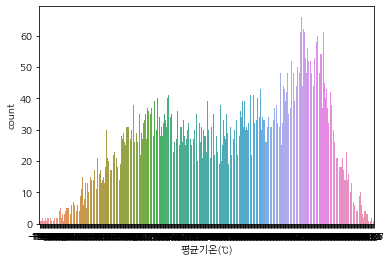

In [70]:
sns.countplot(x=df['평균기온(℃)'])

# 강수량 데이터 추가하기
: https://data.kma.go.kr/stcs/grnd/grndRnList.do?pgmNo=69

## 확보된 데이터(CSV파일)을 데이터프레임으로 읽어오기

In [87]:
mm_df = pd.read_csv('statisticsDivision_20211111134434.csv', encoding='cp949')
mm_df.head()

,일시,평균기온,최고기온 평균,최저기온 평균,강수량
0,1990년,12.8,17.1,9.0,2355.5
1,1991년,12.3,17.0,8.2,1158.2
2,1992년,12.5,16.9,8.5,1454.9
3,1993년,12.0,16.7,8.1,1292.7
4,1994년,13.5,18.3,9.5,1055.8


## 특정일 해당하는 다중지점통계 그래프 그리기

<AxesSubplot:>

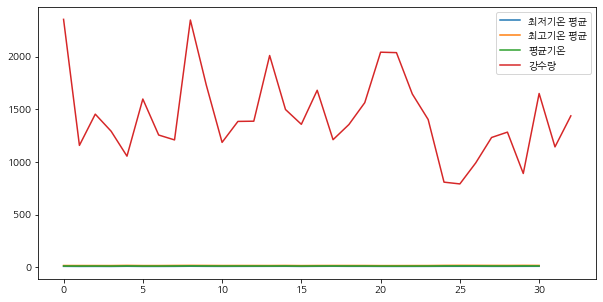

In [129]:
import datetime
wr = mm_df[mm_df['일시'].str.contains('')]

# NaN 행 제거
wr = wr[wr['강수량'].notnull()]
wr[['최저기온 평균', '최고기온 평균', '평균기온', '강수량']].plot(figsize=(10,5))

In [130]:
mm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   일시       33 non-null     object 
 1   평균기온     32 non-null     float64
 2   최고기온 평균  32 non-null     float64
 3   최저기온 평균  32 non-null     float64
 4   강수량      33 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.4+ KB


In [131]:
mm_df.describe()

,평균기온,최고기온 평균,최저기온 평균,강수량
count,32.000000,32.000000,32.000000,33.000000
mean,12.840625,17.403125,8.921875,1438.709091
std,0.517350,0.677988,0.464018,392.804971
min,12.000000,16.300000,8.100000,792.100000
25%,12.450000,16.900000,8.500000,1210.200000
50%,12.900000,17.250000,8.950000,1386.000000
75%,13.225000,17.900000,9.300000,1646.300000
max,13.800000,18.700000,9.800000,2355.500000


<AxesSubplot:xlabel='최저기온 평균', ylabel='최고기온 평균'>

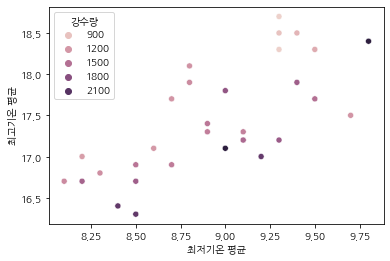

In [132]:
sns.scatterplot(x=mm_df['최저기온 평균'], y=mm_df['최고기온 평균'], hue=mm_df['강수량'])

<AxesSubplot:xlabel='평균기온', ylabel='count'>

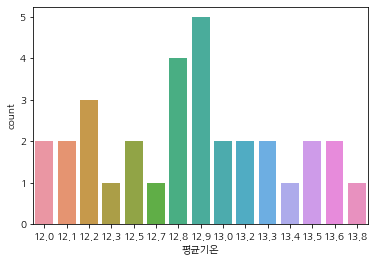

In [133]:
sns.countplot(x=mm_df['평균기온'])

<AxesSubplot:xlabel='강수량', ylabel='count'>

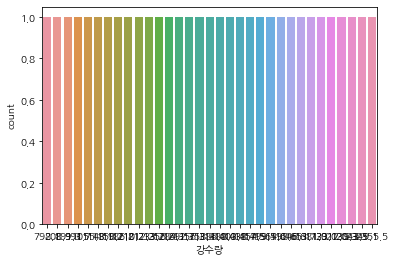

In [134]:
sns.countplot(x=mm_df['강수량'])

<AxesSubplot:>

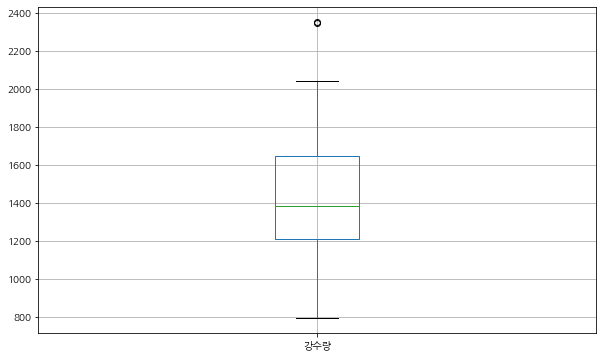

In [143]:
mm_df.boxplot(column = '강수량', figsize=(10,6))